In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Social media impacts for overall performance
### `Purpose`: Analyze the impact of social media addiction on students' academic performance, mental health, and relationships across demographic groups.

## I. Data Understanding

In [ ]:
df = pd.read_csv('/content/Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## Data Overview

- **Total Records:** 705 students
- **Features:** 13 columns, including demographics, social media habits, academic impact, mental health, and relationship factors

## Column Summary

| Column                        | Description                                     |
|-------------------------------|-------------------------------------------------|
| Student_ID                    | Unique identifier for each student              |
| Age                           | Student age (integer)                           |
| Gender                        | Student gender (categorical)                    |
| Academic_Level                | Level of education (categorical)                |
| Country                       | Country of residence                            |
| Avg_Daily_Usage_Hours         | Average daily social media hours (float)        |
| Most_Used_Platform            | Primary social media (categorical)              |
| Affects_Academic_Performance  | Perceived academic impact (categorical)         |
| Sleep_Hours_Per_Night         | Average nightly sleep (float)                   |
| Mental_Health_Score           | Mental health metric (integer)                  |
| Relationship_Status           | Relationship status (categorical)               |
| Conflicts_Over_Social_Media   | Occurrence of conflicts (integer)               |
| Addicted_Score                | Composite addiction score (integer)             |

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

**Summary Statistics**

In [ ]:
display(df.describe(include='number'), df.describe(include='object'))

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
count,705,705,705,705,705,705
unique,2,3,110,12,2,3
top,Female,Undergraduate,India,Instagram,Yes,Single
freq,353,353,53,249,453,384


## II. Data Cleaning

**Check Missing Value**

In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


**Check Duplicatons**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Check Outlier**

In [ ]:
# Numeric columns
numeric = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

summary_outlier= []

for col in numeric:
    s = df[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    summary_outlier.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower,
        'Upper_Bound': upper,
        'Outlier_Count': n_outliers,
    })

summary = (
    pd.DataFrame(summary_outlier)
    .set_index('Column')
    .round(2)
)

display(summary)

,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Outlier_Count
Column,,,,,,
Age,19.0,22.0,3.0,14.50,26.50,0
Avg_Daily_Usage_Hours,4.1,5.8,1.7,1.55,8.35,3
Sleep_Hours_Per_Night,6.0,7.7,1.7,3.45,10.25,0
Mental_Health_Score,5.0,7.0,2.0,2.00,10.00,0
Conflicts_Over_Social_Media,2.0,4.0,2.0,-1.00,7.00,0
Addicted_Score,5.0,8.0,3.0,0.50,12.50,0


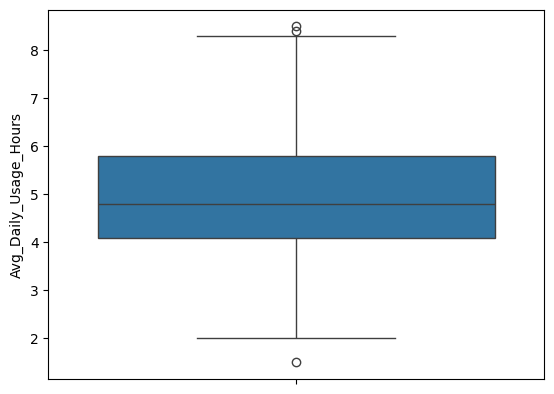

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
6,23,1.5,8.0,9,0,2
486,20,8.4,3.9,5,4,9
496,19,8.5,3.8,5,4,9


In [ ]:
sns.boxplot(df['Avg_Daily_Usage_Hours'])
plt.show()

outliers = summary[summary['Outlier_Count'] > 0].index.tolist()

for col in outliers:
    lower = summary.loc[col, 'Lower_Bound']
    upper = summary.loc[col, 'Upper_Bound']

    mask = (df[col] < lower) | (df[col] > upper)
    display(df.loc[mask, numeric])

`Conclusion:` There are a few outliers in the `Avg_Daily_Usage_Hours` column. However, these values are still realistic and reflect extreme but plausible behaviour, so the outliers are kept in the dataset to preserve the full variability of usage patterns.

## Distribution of Data

**Distributions - Quantitative**

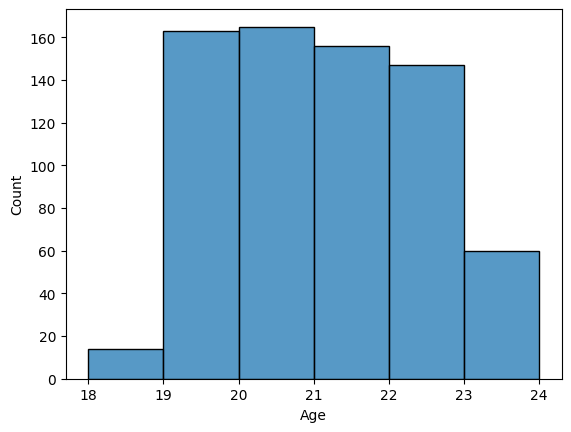

In [ ]:
# Age Distribution
sns.histplot(df['Age'], bins=6)
plt.show()

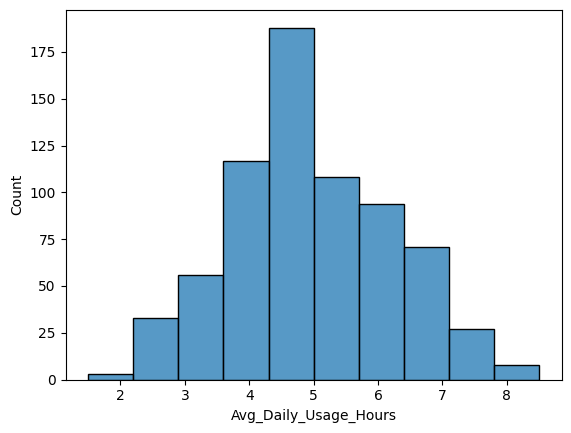

In [ ]:
# Average daily usage hours
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=10)
plt.show()

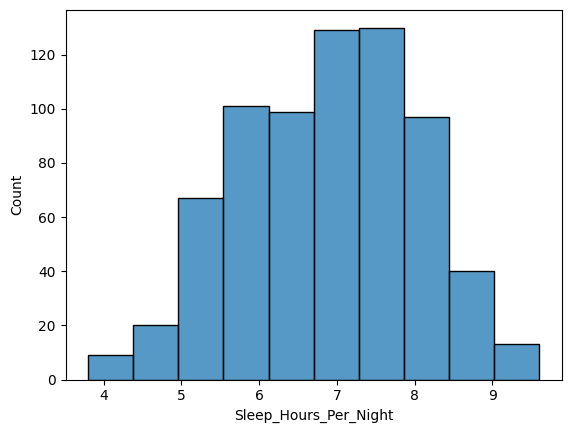

In [ ]:
# Average sleep hours
sns.histplot(df['Sleep_Hours_Per_Night'], bins=10)
plt.show()

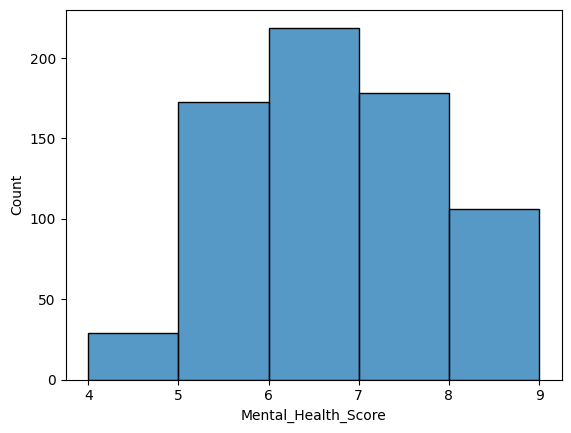

In [ ]:
# Average mental health score (1 = poor to 10 = excellent)
sns.histplot(df['Mental_Health_Score'], bins=5)
plt.show()

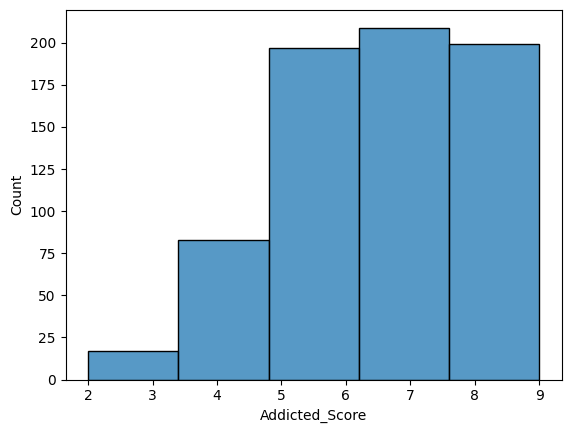

In [ ]:
# Addicted score (1 = low to 10 = high)
sns.histplot(df['Addicted_Score'], bins=5)
plt.show()

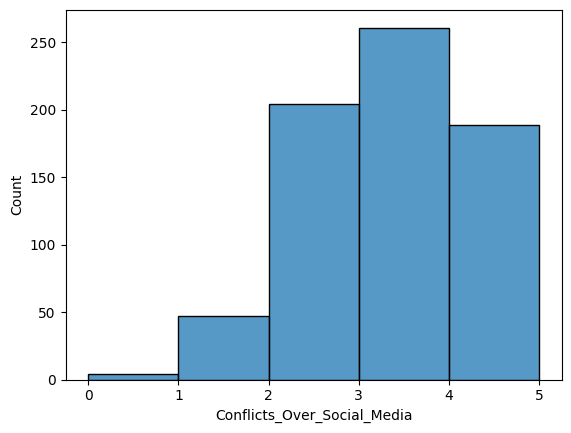

In [ ]:
# Conflicts over social media histogram
sns.histplot(df['Conflicts_Over_Social_Media'], bins=5)
plt.show()

**Qualitative Summary**

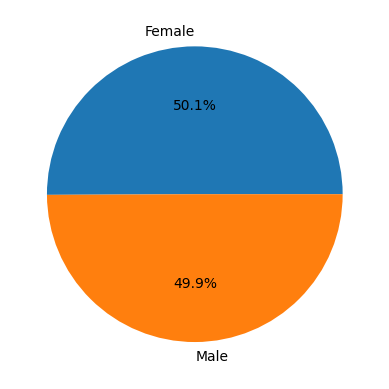

In [ ]:
# Pie chart for gender
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')
plt.show()

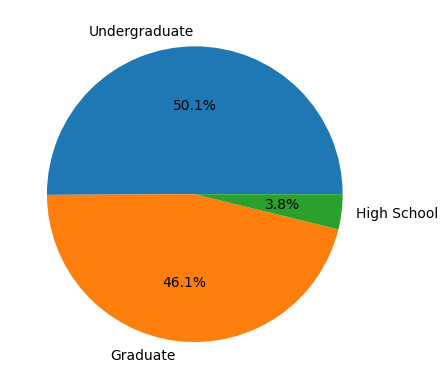

In [ ]:
# Academic score (High School / Undergraduate / Graduate)
plt.pie(df['Academic_Level'].value_counts(), labels=df['Academic_Level'].unique(), autopct='%1.1f%%')
plt.show()

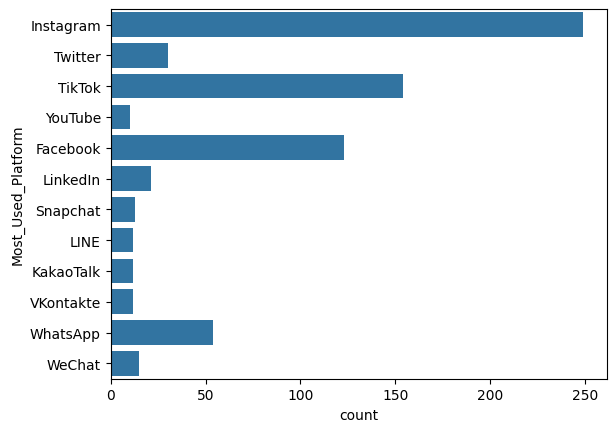

In [ ]:
# Most used social media platform
sns.countplot(df['Most_Used_Platform'])
plt.show()

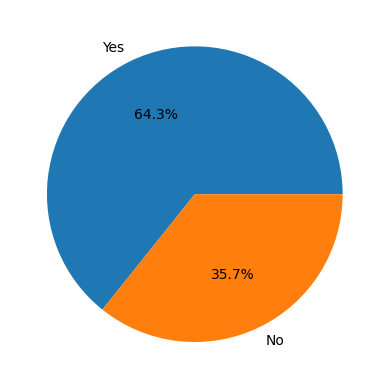

In [ ]:
# Affects academic performance (Yes/No)
plt.pie (df['Affects_Academic_Performance'].value_counts(), labels=df['Affects_Academic_Performance'].unique(), autopct='%1.1f%%')
plt.show()

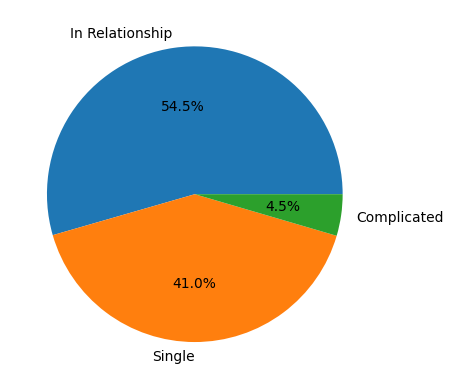

In [ ]:
# Relationship status (Single / In Relationship / Complicated)
plt.pie(df['Relationship_Status'].value_counts(), labels=df['Relationship_Status'].unique(), autopct='%1.1f%%')
plt.show()

## III. Data Analysis

#### Inferential Statistic

Investigate correlation between `Addicted_Score`,`Affects_Academic_Performance`, `Mental_Health_Score`, and `Sleep_Hours_Per_Night`.

1. Addicted_Score and Affects_Academic_Performance

In [ ]:
# Using Mann-Whitney U Test since the data distribution is non-normal
from scipy.stats import mannwhitneyu
group1 = df[df['Affects_Academic_Performance'] == 'Yes']['Addicted_Score']
group2 = df[df['Affects_Academic_Performance'] == 'No']['Addicted_Score']

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

print("Mann–Whitney U statistic:", stat)
print("p-value:", p)

if p < 0.05:
  print('→ There is a significant difference between the two academic performance groups (p < 0.05)')
else:
  print('→ There is no significant difference between the two academic performance groups (p ≥ 0.05)')

Mann–Whitney U statistic: 113796.0
p-value: 4.979132452190705e-111
→ There is a significant difference between the two academic performance groups (p < 0.05)


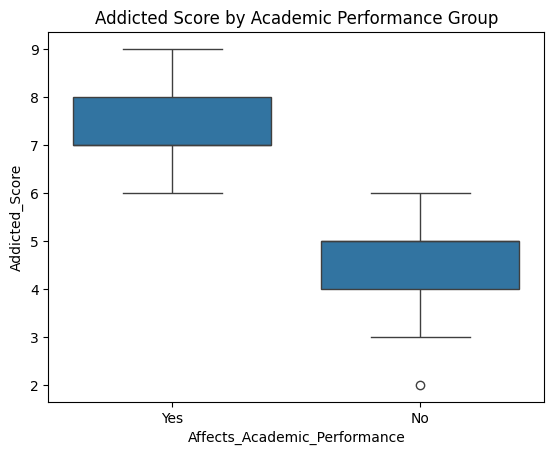

In [ ]:
# Visualisation
sns.boxplot(data=df, x='Affects_Academic_Performance', y='Addicted_Score')
plt.title("Addicted Score by Academic Performance Group")
plt.show()

`Conclusion`: Students who reported that their academic performance was affected had **significantly higher** addiction scores compared to those who reported no impact (U = 113796, p < 0.05).

2. Addicted_Score, Mental_Health_Score, and Sleep_Hours_Per_Night

In [ ]:
# Using Spearman Rank Correlation since one of the variable is non-normal
from scipy.stats import spearmanr
cols1 = ['Addicted_Score', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']
df_corr = df[cols1]
corr_matrix = df_corr.corr(method='spearman')
print('Spearman Correlation Matrix:')
corr_matrix

Spearman Correlation Matrix:


,Addicted_Score,Mental_Health_Score,Sleep_Hours_Per_Night
Addicted_Score,1.000000,-0.949706,-0.787975
Mental_Health_Score,-0.949706,1.000000,0.733767
Sleep_Hours_Per_Night,-0.787975,0.733767,1.000000


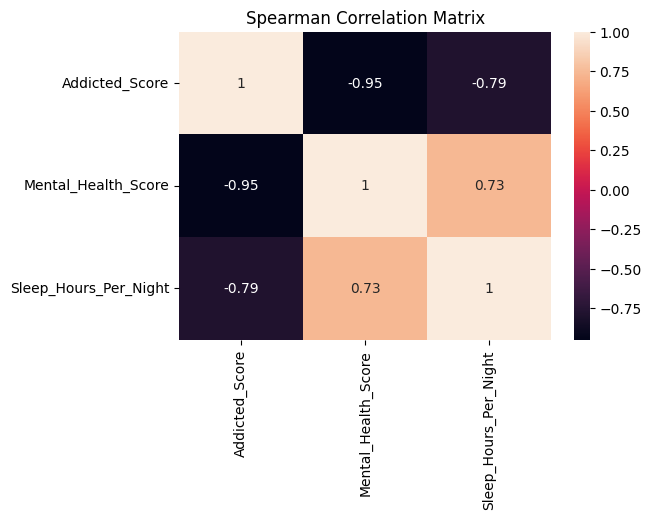

In [ ]:
# Visualisation
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True)
plt.title("Spearman Correlation Matrix")
plt.show()

`Conclusion`: Addicted Score is **strongly and negatively correlated** with both Mental Health Score (p = –0.95) and Sleep Hours per Night (p = –0.79). This indicates that higher levels of addiction are associated with poorer mental health and reduced sleep duration.

Additionally, Mental Health Score and Sleep Hours per Night are **strongly positively correlated** (p = 0.73), suggesting that better mental health is associated with longer sleep duration.

Investigate corelation between `Conflicts_Over_Social_Media` and `Relationship_Status patterns`.




In [ ]:
# Using Kruskal-Wallis test since the data is ordinal and non-normal.

from scipy.stats import kruskal

# Data for each group
groups = [
    group['Conflicts_Over_Social_Media']
    for _, group in df.groupby('Relationship_Status')
]

h, p = kruskal(*groups)

print("Kruskal-Wallis test. H = %.3f, p = %.3f" % (h, p))

if p < 0.05:
    print("→ There is a difference (p < 0.05).")
else:
    print("→ There is no difference (p ≥ 0.05).")


Kruskal-Wallis test. H = 6.944, p = 0.031
→ There is a difference (p < 0.05).


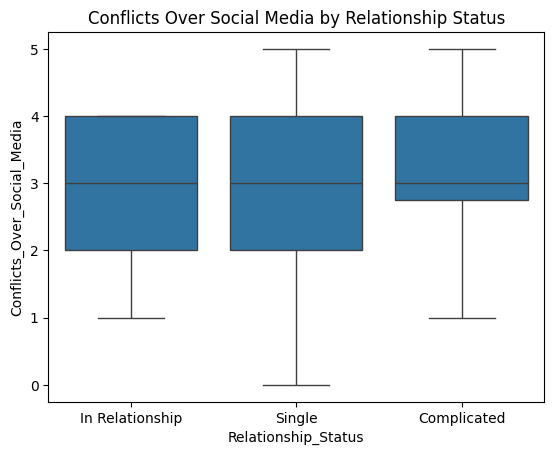

,count,mean,std,min,25%,50%,75%,max
Relationship_Status,,,,,,,,
Complicated,32.0,3.031250,1.062085,1.0,2.75,3.0,4.0,5.0
In Relationship,289.0,2.761246,0.910063,1.0,2.00,3.0,4.0,4.0
Single,384.0,2.901042,0.980541,0.0,2.00,3.0,4.0,5.0


In [ ]:
sns.boxplot(data=df, x='Relationship_Status', y='Conflicts_Over_Social_Media')
plt.title("Conflicts Over Social Media by Relationship Status")
plt.show()

# Descriptive Stats
df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].describe()

---

`Conclusion:` Students with a complicated status slightly have a higher level of conflict over social media (3.03) compare to single (2.90) and in relationship (2.76) status. The boxplot shows that all groups have a similar distribution with a median around 3.

## 3. Does higher addicted score impacting academic performace?

### Using t-test independent for testing  addicted score towards academic performance

Null hypothesis: Mean addiction score is the same for students who report academic impact and those who do not.

Alternative Hypothesis: Mean addiction score differs between the two groups.

In [ ]:
from scipy import stats
yes_scores = df.loc[df["Affects_Academic_Performance"] == "Yes", "Addicted_Score"]
no_scores  = df.loc[df["Affects_Academic_Performance"] == "No",  "Addicted_Score"]

print("Group sizes:", len(yes_scores), len(no_scores))

# Welch's independent-samples t-test (safer default)
t_stat, p_value = stats.ttest_ind(yes_scores,
                                  no_scores,
                                  equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

Group sizes: 453 252
t-statistic: 47.81447644748983
p-value: 8.663595530848732e-204


`Conclusion`: rejecting null hypothesis. Hence, mean addiction score differs between two groups.

Visualization:

[]

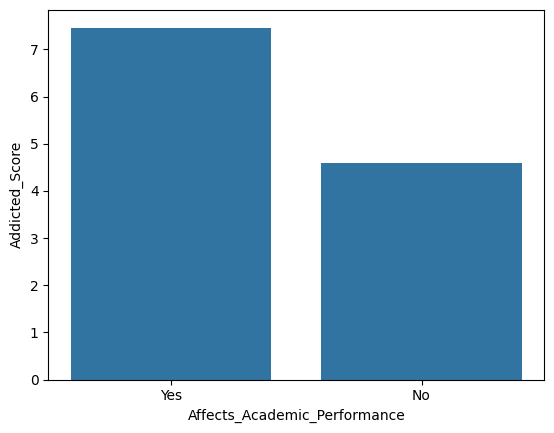

In [ ]:
sns.barplot(x='Affects_Academic_Performance',y='Addicted_Score', data=df,errorbar=None)
plt.plot()

Indeed social media addiction affecting academic performance

## Aggregation

### Demographic segmentation
gender segmentation

In [ ]:
gender_agg = df.groupby("Gender").agg(
    mean_addicted=("Addicted_Score", "mean"),
    mean_usage=("Avg_Daily_Usage_Hours", "mean"),
    affecting_academics=("Affects_Academic_Performance",
                  lambda x: (x == "Yes").mean()),
    number_of_conflicts=("Conflicts_Over_Social_Media","mean")
)
gender_agg

,mean_addicted,mean_usage,affecting_academics,number_of_conflicts
Gender,,,,
Female,6.515581,5.011048,0.654391,2.934844
Male,6.357955,4.826136,0.630682,2.764205


Is there any difference between the addiction and gender tho?

In [ ]:
from scipy import stats
male_scores = df.loc[df["Gender"] == "Male", "Addicted_Score"]
female_scores = df.loc[df["Gender"] == "Female", "Addicted_Score"]

# Welch's independent-samples t-test (safer default)
t_stat, p_value = stats.ttest_ind(male_scores,
                                  female_scores,
                                  equal_var=False)  # Welch t-test

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: evidence of a gender difference in mean addiction score.")
else:
    print("Fail to reject H0: no evidence of a gender difference in mean addiction score.")

t-statistic: -1.3194652533728595
p-value: 0.18745391942945477
Fail to reject H0: no evidence of a gender difference in mean addiction score.


Academic level

In [ ]:
level_agg = df.groupby("Academic_Level").agg(
    mean_addicted=("Addicted_Score", "mean"),
    mean_usage=("Avg_Daily_Usage_Hours", "mean"),
    affecting_academics=("Affects_Academic_Performance",
                  lambda x: (x == "Yes").mean())
)
level_agg

,mean_addicted,mean_usage,affecting_academics
Academic_Level,,,
Graduate,6.243077,4.776923,0.612308
High School,8.037037,5.544444,0.925926
Undergraduate,6.492918,5.001416,0.648725


`Conlcusion:` High school students have the highest average addiction score, daily usage, and share reporting academic impact. This suggests that younger students tend to be more vulnerable to social media addiction and its academic effects.

### Behavioural Segmentation
by platform

In [ ]:
platform_agg = df.groupby("Most_Used_Platform").agg(
    mean_addicted=("Addicted_Score", "mean"),
    mean_usage=("Avg_Daily_Usage_Hours", "mean"),
    number_of_conflicts=("Conflicts_Over_Social_Media", "mean"))
platform_agg

,mean_addicted,mean_usage,number_of_conflicts
Most_Used_Platform,,,
Facebook,5.666667,4.507317,2.430894
Instagram,6.554217,4.872289,2.939759
KakaoTalk,6.000000,4.725000,3.000000
LINE,3.000000,3.250000,1.000000
LinkedIn,3.809524,2.519048,0.904762
Snapchat,7.461538,5.092308,3.230769
TikTok,7.428571,5.346104,3.409091
Twitter,5.500000,4.870000,2.433333
VKontakte,5.000000,4.250000,2.000000


Addiction tier

In [ ]:
bins = [df["Addicted_Score"].min()-0.1, 3.5, 6.5, df["Addicted_Score"].max()]
labels = ["Not Addicted", "Addicted", "Concerning"]
df["Addiction_Tier"] = pd.cut(df["Addicted_Score"], bins=bins, labels=labels)

tier_agg = df.groupby("Addiction_Tier").agg(
    mean_addicted=("Addicted_Score", "mean"),
    mean_sleep=("Sleep_Hours_Per_Night", "mean"),
    mean_mental=("Mental_Health_Score", "mean"),
    affecting_academics=("Affects_Academic_Performance",
                  lambda x: (x == "Yes").mean())
)
tier_agg

/tmp/ipython-input-1213481572.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_agg = df.groupby("Addiction_Tier").agg(


,mean_addicted,mean_sleep,mean_mental,affecting_academics
Addiction_Tier,,,,
Not Addicted,2.941176,8.135294,8.058824,0.000000
Addicted,4.921429,7.757143,7.271429,0.160714
Concerning,7.622549,6.206618,5.433824,1.000000


`Conclusion:` This shows that higher addiction levels are linked to poorer sleep, worse mental health, and more academic problems.

Relationship segmentation

In [ ]:
rel_agg = df.groupby("Relationship_Status").agg(
    mean_addicted=("Addicted_Score", "mean"),
    number_of_conflicts=("Conflicts_Over_Social_Media","mean"))
rel_agg

,mean_addicted,number_of_conflicts
Relationship_Status,,
Complicated,7.031250,3.031250
In Relationship,6.342561,2.761246
Single,6.458333,2.901042


`Conclusion:` This suggests that relationship instability may be associated with more problematic social media use.

## Final Conclusion

1. **Mental Health Impact:**
There is an indicated negative relationship between Addicted Score and Mental Health Score. As the addiction level goes up, mental health tends to go down. Students with higher addiction scores are more likely to report worse mental health, while students with lower addiction scores tend to report better mental well being.

2. **Sleeping Quality Impact:**
Students with higher addiction levels usually sleep fewer hours per night, while those with lower addiction levels sleep longer. This suggests that higher social media addiction is linked to shorter and poorer sleep.

3. **Conflict over Social Media Impact:**
Students with higher addiction levels tend to experience more conflicts with others online, while students with lower addiction levels report fewer or almost no conflicts. This shows that higher addiction is associated with more social media drama.

## Suggestion

1. **Promote Awareness of Social Media Impact:**
Students are encouraged to reflect on their own social media use and recognize early signs of addiction, such as feeling more tired, stressed, or seeing a drop in academic performance.

2. **Set the Limits:**
Set a few simple rules can also enhance students to get better sleep and manage their emotion, such as no phone during homework/study, turn off all non-essential notifications, and avoid excessive late night scrolling.

3. **Provide Student Support:**
Schools/Colleges can provide counseling support for managing stress, establishing healthy sleep patterns and resolving online conflicts in a calm manner.